In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('smoking_health_data_final.csv')
data.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [3]:
data[['blood_pressure_1','blood_pressure_0']] = data['blood_pressure'].str.split('/',expand=True)
data = data.drop(['blood_pressure'], axis=1)
data.head(2)

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,blood_pressure_1,blood_pressure_0
0,54,male,yes,95,NaN,219.0,110,72
1,45,male,yes,64,NaN,248.0,121,72


In [4]:
data['cigs_per_day'].fillna(0)
data.head(2)

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,blood_pressure_1,blood_pressure_0
0,54,male,yes,95,NaN,219.0,110,72
1,45,male,yes,64,NaN,248.0,121,72


In [5]:
data.describe(include='all')

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,blood_pressure_1,blood_pressure_0
count,3900.000000,3900,3900,3900.000000,3886.000000,3893.000000,3900,3900
unique,NaN,2,2,NaN,NaN,NaN,232,144
top,NaN,female,no,NaN,NaN,NaN,130,80
freq,NaN,2081,1968,NaN,NaN,NaN,96,238
mean,49.537949,NaN,NaN,75.688974,9.168554,236.595941,NaN,NaN
std,8.559275,NaN,NaN,12.015376,12.037999,44.375365,NaN,NaN
min,32.000000,NaN,NaN,44.000000,0.000000,113.000000,NaN,NaN
25%,42.000000,NaN,NaN,68.000000,0.000000,206.000000,NaN,NaN
50%,49.000000,NaN,NaN,75.000000,0.000000,234.000000,NaN,NaN
75%,56.000000,NaN,NaN,82.000000,20.000000,263.000000,NaN,NaN


In [6]:
data['current_smoker'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
smokers_counted = (data['current_smoker'] == 'yes').sum()
smokers_counted = float(smokers_counted)
smokers_counted

1932.0

In [8]:
non_smokers_counted = (data['current_smoker'] == 'no').sum()
non_smokers_counted = float(non_smokers_counted)
non_smokers_counted

1968.0

In [9]:
all_people = smokers_counted + non_smokers_counted
all_people

3900.0

In [10]:
smokers_percentage = smokers_counted/all_people*100
non_smokers_percentage = non_smokers_counted/all_people*100
print(smokers_percentage, non_smokers_percentage)

49.53846153846154 50.46153846153846


([<matplotlib.patches.Wedge at 0x251265ec1d0>,
 [Text(0.01594910561296523, 1.0998843693907767, 'smokers_percentage'),
  Text(-0.01594900263435894, -1.099884370884035, 'non_smokers_percentage')])

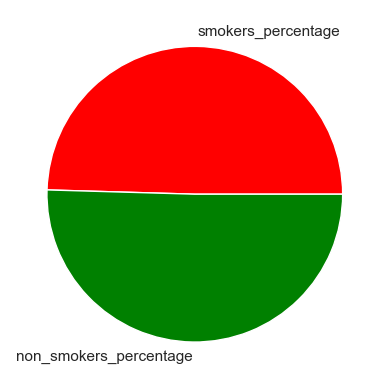

In [11]:
plt.pie([smokers_percentage, non_smokers_percentage], labels=['smokers_percentage','non_smokers_percentage'], colors=['red','green'])

In [17]:
women_smokers = ((data['current_smoker'] == 'yes') & (data['sex'] == 'female')).sum()
women_smokers = float(women_smokers)
women_smokers

827.0

In [18]:
men_smokers = ((data['current_smoker'] == 'yes') & (data['sex'] == 'male')).sum()
men_smokers = float(men_smokers)
men_smokers

1105.0

In [19]:
women_smokers_percentage = women_smokers/smokers_counted*100
men_smokers_percentage = men_smokers/smokers_counted*100
print(women_smokers_percentage, men_smokers_percentage)

42.80538302277433 57.19461697722568


([<matplotlib.patches.Wedge at 0x2512ce5fb90>,
 [Text(0.24651656213843498, 1.0720212612590514, 'women_smokers_percentage'),
  Text(-0.2465164617685594, -1.072021284339593, 'men_smokers_percentage')])

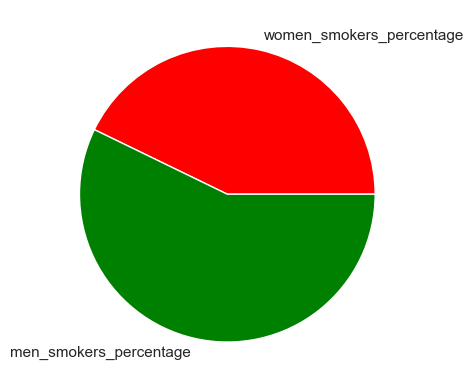

In [24]:
plt.pie([women_smokers_percentage, men_smokers_percentage], 
        labels=['women_smokers_percentage','men_smokers_percentage'],
        colors=['red','green'])